#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 5 Principal Component Analisis (PCA) Alumno: Ibarra Ramírez Sergio </font>

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

Vamos a usar un conjunto de datos sobre vinos

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Aunque PCA se puede ejEcutar sin necesidad de tener conjunto de train y test, en este caso si se hará para una posterior verificación del modelo

In [10]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[1.166e+01, 1.880e+00, 1.920e+00, ..., 1.230e+00, 2.140e+00,
        4.280e+02],
       [1.307e+01, 1.500e+00, 2.100e+00, ..., 1.180e+00, 2.690e+00,
        1.020e+03],
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       ...,
       [1.402e+01, 1.680e+00, 2.210e+00, ..., 1.040e+00, 3.590e+00,
        1.035e+03],
       [1.475e+01, 1.730e+00, 2.390e+00, ..., 1.250e+00, 2.730e+00,
        1.150e+03],
       [1.247e+01, 1.520e+00, 2.200e+00, ..., 1.160e+00, 2.630e+00,
        9.370e+02]])

In [11]:
y_train

array([2, 1, 3, 1, 3, 3, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 2, 1,
       1, 2, 1, 3, 3, 1, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 1, 3, 3, 3, 3, 2,
       2, 2, 1, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 1, 2, 2,
       1, 3, 1, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 2], dtype=int64)

Vamos a hacer la estandarización de nuestros datos para aplicar el modelo PCA

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Add parentheses to initialize the StandardScaler object


## Cuando uno ajusta el modelo se ajusta con los datos de entrenamienmt
X_train_std = sc.fit_transform(X_train)  # Pass X_train as an argument to fit_transform()

## Y para le prueba YA NO SE AJUSTE, SOLO SE TRANSFORMA
X_test_std = sc.transform(X_test)

X_train_std

array([[-1.53245398, -0.47322839, -1.45429618, ...,  1.12186688,
        -0.58527097, -0.93622315],
       [ 0.13442579, -0.79823234, -0.83305425, ...,  0.91928126,
         0.1897869 ,  0.87665654],
       [ 1.09199502,  2.22943611, -0.38437953, ..., -1.51174618,
        -1.72671984, -0.97603301],
       ...,
       [ 1.25750081, -0.6442831 , -0.45340641, ...,  0.35204153,
         1.45806341,  0.92259099],
       [ 2.1204953 , -0.60151942,  0.16783552, ...,  1.20290113,
         0.24615474,  1.27475512],
       [-0.57488475, -0.78112687, -0.48791985, ...,  0.83824702,
         0.10523513,  0.62248591]])

Para obtener matriz de covarianza, eigenvalores y eigenvectores
Se obtiene tantos eigenvalores como número de variables originales 

In [14]:

## Se construye la matriz de covarianza de X_train transpuesta
cov_mat = np.cov(X_train_std.T)

## Se obtienen los eigenvectores y eigenvalores de la matriz de covarianza

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Eigenvals:', eigen_vals)
print('Eigenvecs:', eigen_vecs)

Eigenvals: [4.65327863 2.57624738 1.59489468 0.97387032 0.87052705 0.64469935
 0.55003138 0.33128871 0.0984789  0.26111997 0.22416932 0.17146008
 0.15562526]
Eigenvecs: [[ 0.11606498  0.4926146  -0.23628768  0.25552149  0.07370003  0.17030129
   0.13873808 -0.352649   -0.02863895 -0.15927745  0.53281417  0.26732209
  -0.25129931]
 [-0.27006263  0.19143609  0.12603261  0.28990563 -0.52648484 -0.00652793
   0.5804761   0.00388719 -0.00545479  0.34291542 -0.00838364 -0.20152807
   0.13411865]
 [-0.02282683  0.32618626  0.58849568 -0.03115029  0.2659841   0.25985377
   0.06862558 -0.01112666  0.17859282  0.10293481 -0.26448318  0.48925067
   0.22554518]
 [-0.24217816 -0.0144121   0.60513876 -0.04591822 -0.05452162  0.16165347
  -0.2068412  -0.32575997 -0.11515182 -0.22230048  0.1434725  -0.44606019
  -0.33556198]
 [ 0.11523873  0.28770025  0.09465079 -0.80174343 -0.12468546 -0.11215982
   0.20356837  0.26929486 -0.02953345  0.03026169  0.32255043 -0.04628893
  -0.04627925]
 [ 0.3938087   0

Vamos a construir una gráfica que nos ayude a identificar cuales son los eigenvalores más grandes que serían aquellas caracterisrticas / valores originales que más varianza capturan/ aportan 

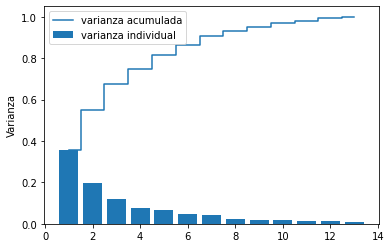

In [16]:
## Grafica con los aportes de cada eigenvalor 

tot = sum(eigen_vals)
## Para cada eigenvalor dividir su valor entre el total de la suma de eigen_vals
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]


## Se va sumando los valores de las varianzas apaortadas por cada eigen_val 
cum_var_exp = np.cumsum(var_exp)

## Las varianzas individuales se grafican como barras
plt.bar(range(1,14), var_exp, label='varianza individual', align='center')

##La varianza acumulada se grafica como step 
plt.step(range(1,14), cum_var_exp, where='mid', label='varianza acumulada')
plt.legend(loc='best')
plt.ylabel('Varianza')
plt.show()


Vamos a formar una especie de pares de eigenvalores, eigenvectores 

In [23]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
             for i in range(len(eigen_vals))]

## Obetendremos un array de tuplas de (eigen_val, eigen_vec) 
#eigen_par

## Ordenando por eigen_vals desdendentemente 

eigen_par.sort(key=lambda k: k[0], reverse=True)
eigen_par[-1]

(0.09847890481317864,
 array([ 0.31639443,  0.06904914,  0.17807299, -0.02090025, -0.33503836,
        -0.6710579 , -0.10323884, -0.45953685,  0.07598135, -0.11981108,
        -0.13581899,  0.17628521,  0.09448308]))

Nos vamos a quedar solo con los dos primeros eigen valores y vamos a construir la matriz de proyección 

np.newaxis lo transforma en un vector columna 

In [27]:
W = np.hstack((eigen_par[0][1][:,np.newaxis],
               eigen_par[1][1][:,np.newaxis]))

print('Matriz de proyeccion W: \n', W)

Matriz de proyeccion W: 
 [[ 0.11606498 -0.27006263]
 [ 0.4926146   0.19143609]
 [-0.23628768  0.12603261]
 [ 0.25552149  0.28990563]
 [ 0.07370003 -0.52648484]
 [ 0.17030129 -0.00652793]
 [ 0.13873808  0.5804761 ]
 [-0.352649    0.00388719]
 [-0.02863895 -0.00545479]
 [-0.15927745  0.34291542]
 [ 0.53281417 -0.00838364]
 [ 0.26732209 -0.20152807]
 [-0.25129931  0.13411865]]


De un vector de 1x13, tenemos ahora uno de 1x2

In [28]:
print('Original: ', X_train_std[0])

print('Proyectada: ', X_train_std[0].dot(W))

Original:  [-1.53245398 -0.47322839 -1.45429618 -1.08962087 -0.15853337 -1.0436572
 -0.41555767 -0.23171164 -0.78766242 -0.55732122  1.12186688 -0.58527097
 -0.93622315]
Proyectada:  [ 0.27675587 -0.53159336]


Transformando TODO el conjuntode datos de entrenamiento 

In [30]:
## Transformando TODOel conjuntode datos de entrenamiento 
X_train_PCA = X_test_std.dot(W) 
X_train_PCA

array([[-2.07392263e+00,  5.20965512e-01],
       [-1.18221908e+00,  9.27893107e-01],
       [ 2.85620419e-01, -6.03891552e-01],
       [-1.41786723e-01,  4.08663134e-01],
       [-7.06937290e-01, -1.80103160e-01],
       [-5.24147762e-01,  2.86847281e-01],
       [ 3.26310537e-01, -1.79644820e-01],
       [-5.91637453e-01, -1.54482239e-01],
       [ 5.18263393e-01, -9.38255010e-02],
       [ 9.63420575e-02,  1.74676902e-01],
       [ 1.09166928e+00, -1.37428092e+00],
       [ 8.85281382e-01, -7.43598599e-01],
       [ 1.65145401e+00, -1.92803026e-01],
       [ 1.15433642e-01, -3.57554342e-01],
       [ 2.09764370e-01,  5.53663310e-01],
       [-5.69286812e-01, -7.64138390e-01],
       [ 1.83209351e-01,  5.46458620e-01],
       [-1.22284854e+00, -4.17050168e-01],
       [-1.53795788e-04,  5.77375341e-01],
       [-7.32656321e-02, -2.44160509e-01],
       [ 3.09932481e-01, -1.02276258e+00],
       [ 3.26722239e-01,  5.52367063e-01],
       [-1.14315785e+00,  1.56394046e-01],
       [ 7.

ValueError: 'c' argument has 124 elements, which is inconsistent with 'x' and 'y' with size 54.

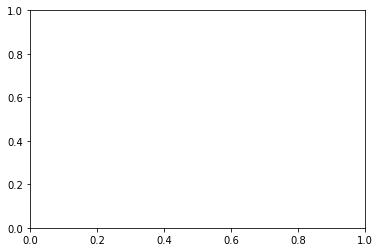

In [31]:
colors = np.array([None, 'red', 'blue', 'green'])
y = y_train
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1],
 alpha=0.5, c=colors[y], edgecolor='black')

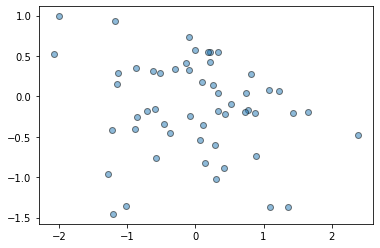

In [32]:
colors = np.array([None, 'red', 'blue', 'green'])
y = y_train
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1],
 alpha=0.5, edgecolor='black')

##### Vamos a aplicar un modelo de PCA (de sklearn) +  un modelo de regresión logistica para clasificación de los 3 tipos de vinos, usando solamrnte las variables 'ya reducidas'

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [36]:
from tables import tests
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Add parentheses to initialize the StandardScaler object


## Cuando uno ajusta el modelo se ajusta con los datos de entrenamienmt
X_train_std = sc.fit_transform(X_train)  # Pass X_train as an argument to fit_transform()

## Y para le prueba YA NO SE AJUSTE, SOLO SE TRANSFORMA
X_test_std = sc.transform(X_test)

X_train_std


array([[-0.57022483, -0.91804297, -1.80621821, ...,  0.40074559,
         0.27687332, -0.55109747],
       [-0.86130792, -0.66000932, -0.17526203, ..., -0.24662873,
         0.29070026, -1.22723595],
       [-0.41835539, -0.4998505 , -0.58300107, ...,  0.91864505,
         0.7884701 , -0.08394725],
       ...,
       [ 1.04971584, -0.4286688 ,  1.00718121, ..., -0.28978702,
         1.36920158,  1.08700165],
       [-0.02602601, -1.3095423 , -2.58092239, ...,  1.04811992,
        -0.12410794, -1.07356811],
       [-0.15258388,  1.27079419,  1.25182463, ...,  0.3575873 ,
         1.31389382,  0.08816072]])

Importamos las librerias necesarias para PCA y para LogisticRegression

In [33]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

Creamos los objetos de PCA y LogisticRegression, así como entrenar y aplicar el PCA

In [37]:

## Se crea el objeto PCA defineidno el n_components con que 'nos quedaremos' 
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

## Se entrena el modelo PCA 

X_train_PCA_sk_learn = pca.fit_transform(X_train_std)


# Se hace la transformación / aplica el PCA ya entrenado para los X_test
X_test_PCA_sk_learn = pca.transform(X_test_std)


X_test_PCA_sk_learn


array([[-2.60266631,  0.13723067],
       [ 1.08561969,  1.74704199],
       [ 2.93620676, -0.26508097],
       [-2.43311041, -0.55481067],
       [ 2.51293502, -2.69004672],
       [-2.14710583,  0.24819295],
       [-0.98395646,  0.74384932],
       [-1.29817022,  0.25347213],
       [-2.50871118, -1.33693844],
       [-4.48262386, -1.88961542],
       [ 0.51915705,  2.26419949],
       [ 0.60264525,  2.64085769],
       [-1.08317866, -1.08820488],
       [-1.57881938,  0.95590166],
       [ 1.86193486,  1.56559189],
       [ 0.98793822, -3.64363249],
       [-0.90036116,  1.44743751],
       [-2.82163467, -1.34017984],
       [ 2.85129551, -1.52509705],
       [ 3.45865219, -1.26169298],
       [ 2.28621643, -2.79298943],
       [-1.26007023, -0.72729033],
       [-1.8463505 , -0.5292124 ],
       [ 2.06335729, -0.33118397],
       [ 3.82915044, -0.80436677],
       [ 0.4622422 ,  0.15148578],
       [ 0.60100087,  2.1573147 ],
       [-2.95619052, -0.7513067 ],
       [ 2.49381748,

También se entrena el modelo de LogisticRegression

In [38]:
lr.fit(X_train_PCA_sk_learn, y_train)

LogisticRegression(solver='liblinear')

Ahora vamos a graficar los resultados de la clasificación con Regresion Logistica (primero para los datos de train)

<AxesSubplot:>

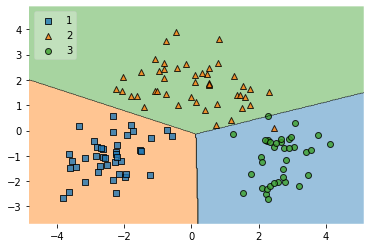

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_PCA_sk_learn, y_train, clf=lr, legend=2)

Ahora veamos como se ve el de test

<AxesSubplot:>

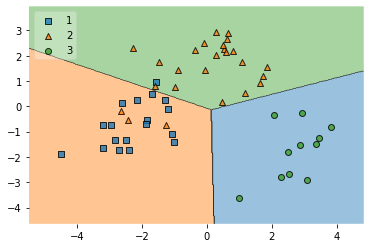

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_PCA_sk_learn, y_test, clf=lr, legend=2)